In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

Download the dataset here:

https://data.opendatasoft.com/explore/dataset/les-arbres%40parisdata/information/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable

In [2]:
df = pd.read_csv('./data/les-arbres@parisdata.csv', delimiter=';',)

In [3]:
df = df.drop(columns=['COMPLEMENT ADRESSE', 'NUMERO', 'LIBELLE FRANCAIS', 'VARIETE OUCULTIVAR', 
                      'DOMANIALITE', 'ARRONDISSEMENT', 'LIEU / ADRESSE', 'IDEMPLACEMENT', 'IDBASE',
                     ])

In [4]:
df['Latitude'] = df['geo_point_2d'].apply(lambda x: x.split(',')[0]).astype(float)
df['Longitude'] = df['geo_point_2d'].apply(lambda x: x.split(',')[1]).astype(float)
df = df.drop(columns='geo_point_2d')
df

,TYPE EMPLACEMENT,GENRE,ESPECE,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,Latitude,Longitude
0,Arbre,Prunus,serrulata,85,8,Adulte,NON,48.891772,2.369950
1,Arbre,Pinus,wallichiana,30,5,NaN,NaN,48.865565,2.412083
2,Arbre,Paulownia,tomentosa,175,10,Adulte,NON,48.856887,2.393305
3,Arbre,Platanus,x hispanica,112,13,Adulte,NON,48.870191,2.322984
4,Arbre,Aesculus,x carnea,55,5,Jeune (arbre),NON,48.878120,2.397517
...,...,...,...,...,...,...,...,...,...
207668,Arbre,Platanus,x hispanica,150,14,Adulte,NON,48.849997,2.259789
207669,Arbre,Prunus,serrulata,63,7,Jeune (arbre)Adulte,NON,48.891461,2.316190
207670,Arbre,Corylus,colurna,90,0,NaN,NON,48.874489,2.376797
207671,Arbre,Acer,pseudoplatanus,200,20,Adulte,NON,48.889080,2.329022


In [5]:
sns.set_style('whitegrid')

In [6]:
types = df['GENRE'].value_counts().reset_index()
types.columns = ['family', 'count']

types.head(10)

,family,count
0,Platanus,42630
1,Aesculus,24857
2,Tilia,22140
3,Acer,19291
4,Styphnolobium,11585
5,Prunus,7827
6,Fraxinus,6074
7,Pinus,4947
8,Pyrus,4718
9,Quercus,4692


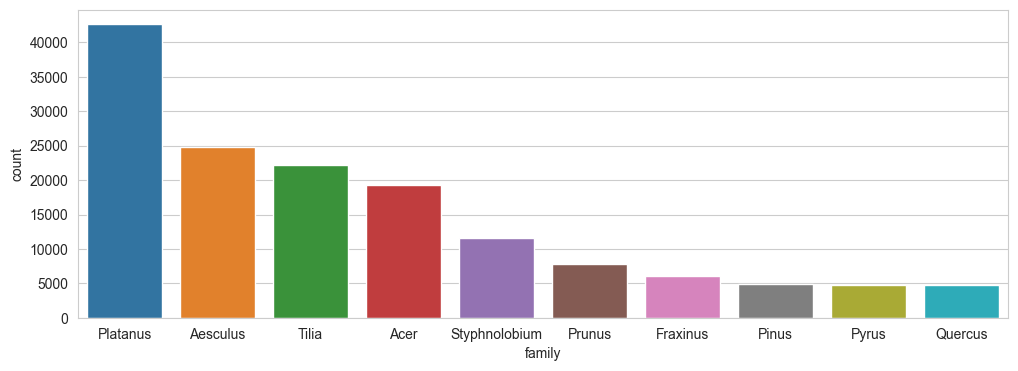

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=types.iloc[:10, :], x='family', y='count')
plt.savefig('./plots/2024-01-05_paristrees_counts.png', dpi=150, bbox_inches='tight')
plt.show()

In [8]:
tall = df.groupby('GENRE')['HAUTEUR (m)', 'CIRCONFERENCE (cm)'].mean().reset_index()
tall.columns = ['family', 'height', 'circumference']
df2 = pd.merge(tall, types)

C:\Users\k202141\AppData\Local\Temp\ipykernel_21248\2678246442.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tall = df.groupby('GENRE')['HAUTEUR (m)', 'CIRCONFERENCE (cm)'].mean().reset_index()


In [9]:
df2

,family,height,circumference,count
0,Abelia,6.000000,75.000000,1
1,Abies,5.422535,43.640845,142
2,Acacia,5.692308,40.769231,13
3,Acca,1.000000,10.000000,1
4,Acer,7.382977,69.697631,19291
...,...,...,...,...
176,x Chitalpa,3.509804,26.941176,51
177,x Crataemespilus,0.000000,0.000000,2
178,x Cupressocyparis,8.165187,57.030195,563
179,x Sorbopyrus,0.000000,0.000000,1


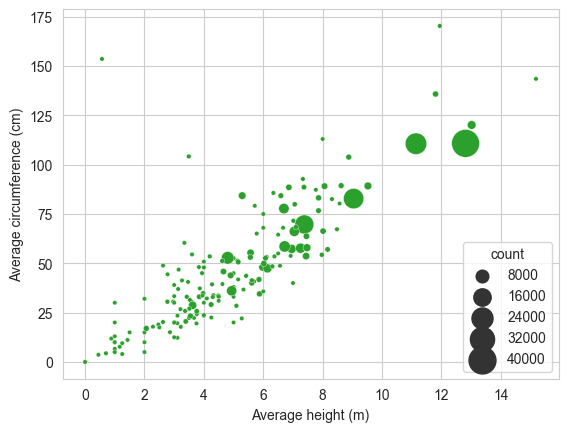

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(data=df2, 
                x='height',
                y='circumference',
                size='count', sizes=(10, 400),
                color='C2',
              )

ax.set_xlabel('Average height (m)')
ax.set_ylabel('Average circumference (cm)')

plt.savefig('./plots/2024-01-05_paristrees_tall_circ.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df2.query('count > 5000'), 
                x='height',
                y='circumference',
                size='count', sizes=(10, 400),
                hue='family',
              )

ax.set_xlabel('Average height (m)')
ax.set_ylabel('Average circumference (cm)')

plt.savefig('./plots/2024-01-05_paristrees_tall_circ_fam.png', dpi=150, bbox_inches='tight')
plt.show()